In [109]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
from numpy.linalg import norm,solve
from itertools import count
from IPython import display
import seaborn as sns
from IPython.display import HTML
from scipy.io import loadmat
from utils.helper_util import Func_GaussElimination,plotter

In [110]:
##Wave Propagation
alph=0.005

a=0.4
b=-0.1
c=0.1
d=0.6
k=0.5

sigma=0.01

w=0.2*np.pi
## grid
N  = 100 ;
x  = np.linspace(0, 1, N+2)
u_ss=0.4+0.6*x
CFL=0.4
x  = x[0:N] 
dx = x[1] - x[0] 
dt=(dx**2)/(2*alph)
#Delta
#dt=CFL*dx/(c)
t_domain=np.linspace(0, 400, int((400 - 0) / dt + 1))
dum1=(-b/(a*dx-b))-2
dum2=c*dt/(dx*(a*dx-b))
p=(alph*dt)/(dx**2)
#initial condition
f0=np.zeros(len(x))
f0=f0.reshape((len(f0),1))
BCV=np.zeros((len(f0),1))
f_new=f0

In [111]:
f_new_list=[]
xlist=[]

for it in range(20000):
    BCV[0] = (alph*dt) * ( ( (-b/(a*dx-b) -2)*f_new[0,0] + f_new[1,0] )/(dx**2) + c/(dx*(a*dx-b) ) )
    BCV[-1] = (alph*dt) * ( ((f_new[-2,0]-f_new[-1,0]) / (dx**2)) + d/dx )
    f_new=f_new+BCV
    for j in range(1,len(x)-1):
        kappa=k*np.sin(w*it*dt)*np.exp((-(x[j]-0.5)**2)/sigma)

        k1 = (alph/(dx**2))*(f_new[j-1,0] - 2*f_new[j,0] + f_new[j+1,0] ) + kappa 

        f1 = [ f_new[j-1,0] + k1*dt/2 , f_new[j,0] + k1*dt/2, f_new[j+1,0] + k1*dt/2] 

        k2 = (alph/dx**2) * ( f1[0] - 2*f1[1] + f1[2] ) + kappa 
        f2 = [ f_new[j-1,0] + k1*dt/2, f_new[j,0] + k2*dt/2, f_new[j+1,0] + k2*dt/2]

        k3 = (alph/dx**2)*( f2[0] - 2*f2[1] + f2[2] ) + kappa
        f3 = [ f_new[j-1,0] + k1*dt, f_new[j,0] + k1*dt, f_new[j+1,0] + k1*dt]

        k4 = (alph/dx**2)*( f3[0] - 2*f3[1] + f3[2] ) + kappa

        f_new[j,0] = f_new[j,0] + (k1 + 2*k2 + 2*k3 + k4 ) * dt/6
    u_x_t=np.insert(np.insert(f_new, 0, ((b*f_new[0,0]-dx*c)/(b-dx*a))),len(x)+1,dx*d + f_new[-1])
    f_new_list.append(u_x_t)
    xlist.append(np.insert(np.insert(x, 0, 0),len(x)+1,1))

In [103]:
point1=int(10/dt)
point2=int(52/dt)
point3=int(104/dt)
point4=int(196/dt)

plt.plot(xlist[point1],f_new_list[point1],'--k',label='t=10')
#plt.plot(xlist[point1],f_new_list[point1],label='t=10',color='red')
#plt.plot(xlist[point2],f_new_list[point2],label='t=52',color='blue')
plt.plot(xlist[point2],f_new_list[point2],'--o',label='t=52')
plt.plot(xlist[point3],f_new_list[point3],label='t=104',color='Red')
#plt.plot(xlist[point3],f_new_list[point3],label='t=104',color='Yellow')
plt.plot(xlist[point3],f_new_list[point4],label='t=196',color='Orange')
plt.xlabel(" $X_{domain}$ ", fontsize='15')
plt.ylabel("U", fontsize='15')
plt.legend()
#plt.minorticks_on()
plt.tick_params(direction='in', right=True, top=True)
plt.tick_params(labelsize=14)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
#plt.tick_params(direction='in', which='minor', length=6, bottom=True, top=True, left=True, right=True)
#plt.tick_params(direction='in', which='major', length= 12, bottom= True, top= True, left=True, right=True)

plt.title('Diffusion With source', fontsize='15')
#ax.set_ylabel('u')
#ax.set_title('CFL_0.8 at t=3')
#plt.figure(figsize=(4, 3), dpi=80)

19993.96

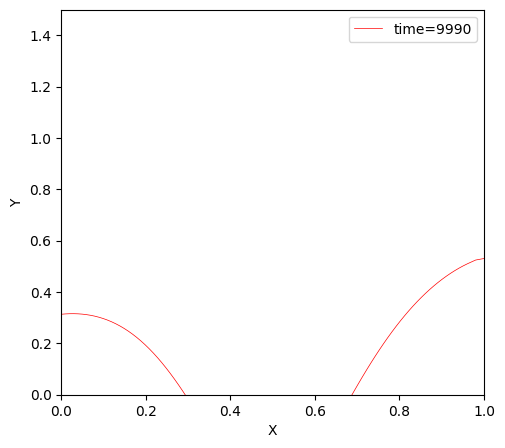

In [87]:
dat_acq_int=10
HTML(plotter(xlist,f_new_list,interv=100,dat_acq=dat_acq_int,p=0,q=1.5).to_html5_video())